# Interesting insights



In [1]:
"""
    DATA EXPLORATION GOALS
        - how many samples are not classified and why
        - narrow down a df with samples where num_genr and num_dt are > 0
        - view realtionships in data where features are available
"""


import pandas as pd

<hr>

# Goal: see the most frequently used terms visualized by label

In [2]:
# Load merged dataset (sparse matrix of feature labels for a given impression)
df = pd.read_csv('joined_master_sparse.csv')

# Remove entries that lack genres or descriptions
df = df[df['num_genres'] != 0]
df = df[df['num_descriptors'] != 0]

df

,imp_id,filename,num_genres,num_descriptors,map,allegory,maritime,portrait,architecture,landscape,...,wound,crepuscular ray,shelf,water / liquid,razor,vomit,shoe (not worn),skins / pelts,animal attack,pomander
1,2,20982-10.jpg,1,13,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,30230-40.jpg,1,6,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
5,6,20112-40.jpg,1,3,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
7,8,20663-20.jpg,1,3,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
8,9,30270-30.jpg,1,6,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11622,11632,30464-30.jpg,1,6,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
11623,11633,30464-20.jpg,1,3,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
11624,11634,30464-10.jpg,1,8,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11625,11635,30462-20.jpg,1,8,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [3]:
# Load a list of genres and descriptions
genres = pd.read_csv('genreTerms.csv')['BGT_Term'].unique().tolist()
descriptions = pd.read_csv('descriptiveTags.csv')['DT_Tag'].unique().tolist()

# Print the labels
print('=========================================')
print('GENRES')
print('=========================================')
print(genres)
print()
print('=========================================')
print('DESCRIPTORS')
print('=========================================')
print(descriptions)

GENRES
['map', 'allegory', 'maritime', 'portrait', 'architecture', 'landscape', 'still life', 'narrative', 'emblem / symbol', 'memento mori', "printer's mark", 'animal art']

DESCRIPTORS
['ax', 'candle', 'carriage', 'knife / dagger', 'loom', 'comb', 'bayonet', 'bell', 'mallet', 'hourglass', 'book', 'bow', 'musket', 'pitchfork', 'broom', 'abacus', 'brush', 'net / snare', 'cane', 'cannon', 'paper', 'cart', 'tool, unspecified', 'gallows / scaffold', 'globe', 'gun', 'map', 'lantern', 'arrow', 'key', 'telescope', 'lance', 'lifeboat', 'plow', 'pole', 'quill / inkwell', 'quiver', 'rowboat', 'ruler', 'scissors', 'scroll', 'scythe', 'shield', 'ship', 'sieve', 'spear', 'spinning wheel / distaff', 'staff / walking stick', 'stake', 'sword, unsheathed or on ground', 'target', 'torch', 'jewelry (not worn)', 'switch / whip', 'plant, unspecified', 'Alphabet A', 'Alphabet B', 'Alphabet C', 'Alphabet D', 'Alphabet E', 'Alphabet F', 'Alphabet G', 'Alphabet H', 'Alphabet I', 'Alphabet J', 'Alphabet K', 'A

# Off the bat, it appears there are about 10,000 incomplete samples. These are cases where either a sample lacked desc_tags or when it lacked genre terms. A sample was dropped if it contained desc tags, but not genre terms and vice versa




<AxesSubplot:title={'center':'Distribution of Genre Counts over all samples'}>

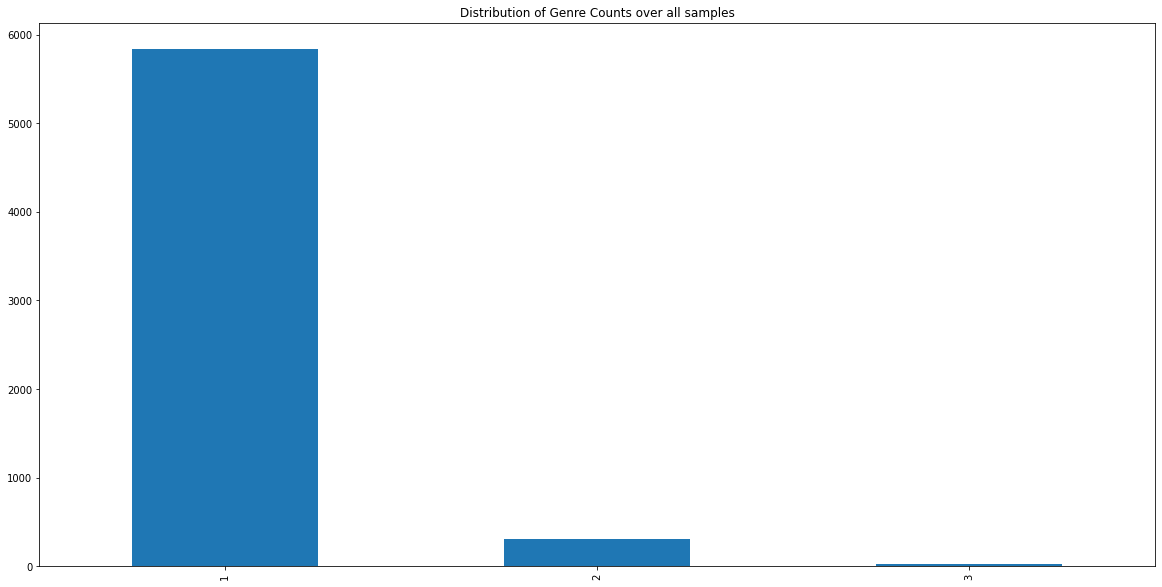

In [4]:
# Plot the distribution of number of genres

df['num_genres'].value_counts().plot.bar(figsize = (20, 10), title = 'Distribution of Genre Counts over all samples')

<AxesSubplot:title={'center':'Distribution of Descriptor Counts over all samples'}>

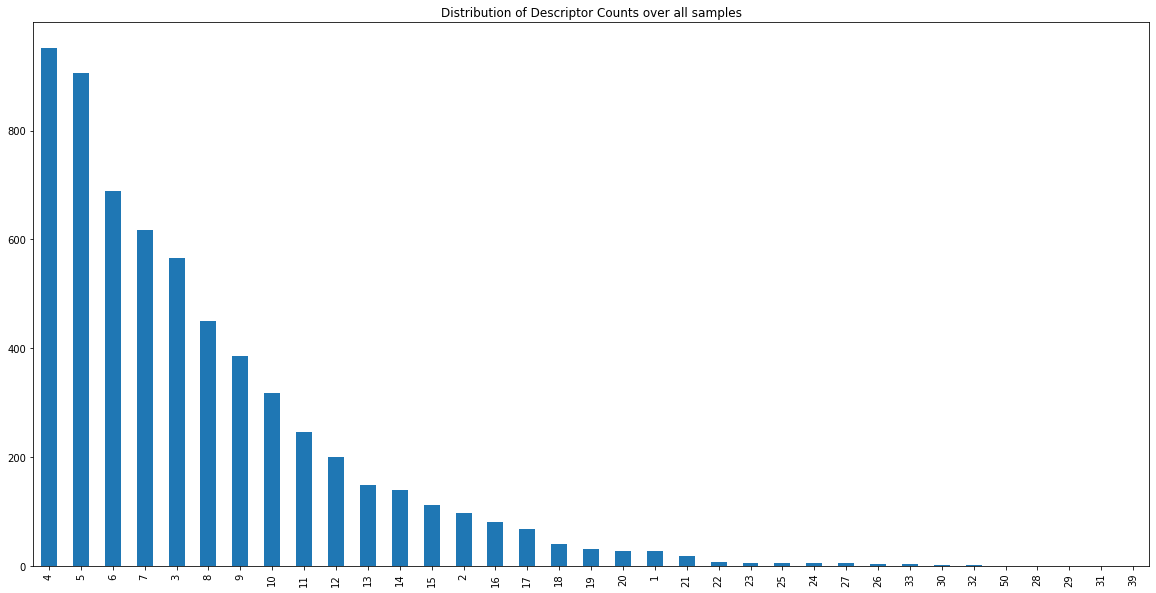

In [5]:
# Plot the distribution of number of descriptors

df['num_descriptors'].value_counts().plot.bar(figsize = (20, 10), title = 'Distribution of Descriptor Counts over all samples')

# Most of the complete samples contain a small amount of descriptors / genres, while a few contain many. My initial intuition is that a majority of the images arent that visually complex, and thus lack labels. I hope to test this and report it 

In [6]:
# Count the occurrences of each genre

genre_counts = {}
for genre in genres:
    try:
        genre_counts[genre] = [df[genre].value_counts()[True]]
    except:
        genre_counts[genre] = [0]
    
genre_counts = dict(sorted(genre_counts.items(), key=lambda x: x[1], reverse=True))
    
genre_counts

{'portrait': [4153],
 'narrative': [1445],
 'emblem / symbol': [325],
 'maritime': [180],
 'still life': [145],
 'allegory': [76],
 'memento mori': [51],
 'architecture': [50],
 'animal art': [50],
 'landscape': [39],
 'map': [3],
 "printer's mark": [3]}

<AxesSubplot:title={'center':'Distribution of indiviual Genres'}>

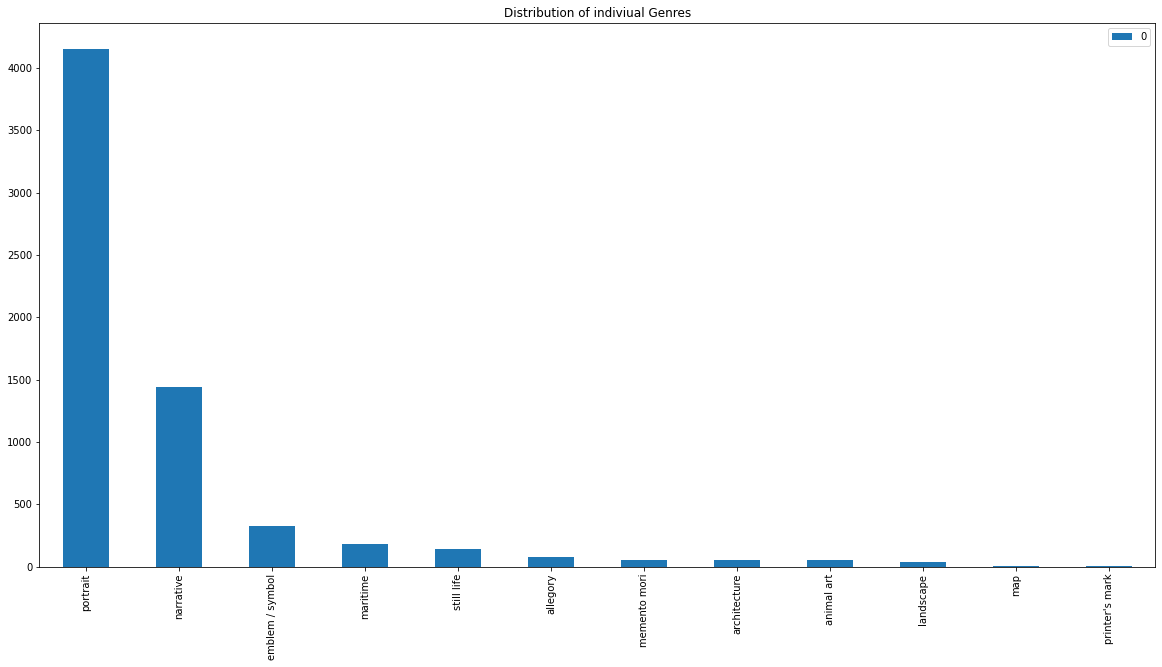

In [7]:
# Plot the frequencies of each genre term

pd.DataFrame(genre_counts).T.plot.bar(figsize = (20, 10), title = 'Distribution of indiviual Genres')

In [8]:
# Count the occurrences of each descriptor

description_counts = {}
for description in descriptions:
    try:
        description_counts[description] = [df[description].value_counts()[True]]
    except:
        description_counts[description] = [0]
    
description_counts = dict(sorted(description_counts.items(), key=lambda x: x[1], reverse=True))

<AxesSubplot:title={'center':'Distribution of individual Descriptors'}>

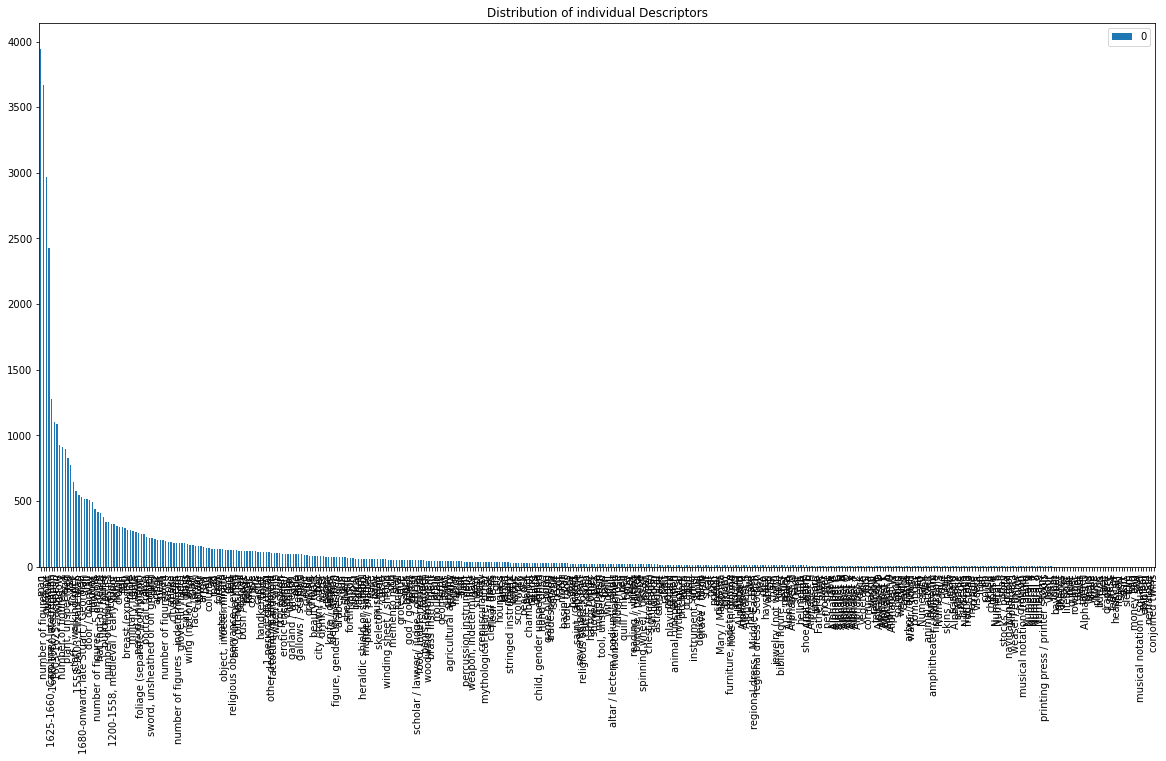

In [10]:
# Plot the frequencies of each descriptor tag

pd.DataFrame(description_counts).T.plot.bar(figsize = (20, 10), title = 'Distribution of individual Descriptors')

In [12]:
df.columns

Index(['imp_id', 'filename', 'num_genres', 'num_descriptors', 'map',
       'allegory', 'maritime', 'portrait', 'architecture', 'landscape',
       ...
       'wound', 'crepuscular ray', 'shelf', 'water / liquid', 'razor', 'vomit',
       'shoe (not worn)', 'skins / pelts', 'animal attack', 'pomander'],
      dtype='object', length=425)

# Now check if there are descriptive tags that always occur for a given genre

for each genre, build a dictionary of descriptive terms associated with it